# Prediksi Hujan di Denpasar

Praktikum ini menggunakan _dataset_ [Denpasar Weather Data](https://www.kaggle.com/datasets/cornflake15/denpasarbalihistoricalweatherdata?select=openweatherdata-denpasar-1990-2020v0.1.csv) dengan modifikasi. _Dataset_ digunakan untuk melakukan prediksi penarikan kesimpulan kebenaran kondisi hujan pada kondisi tertentu. Hal itu diperoleh dengan meninjau `raining` (diekstrak dari `weather_main`) sebagai target. Fitur yang digunakan adalah sebagai berikut:
- `hour` (diekstrak dari `dt_iso`)
- `temp`
- `temp_min`
- `temp_max`
- `pressure`
- `humidity`
- `wind_speed`
- `wind_deg`

Tujuan praktikum:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hiperparameternya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan sebelum waktu praktikum selesai (17 April 2023, pukul 10.59 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai (17 April 2023, pukul 23.59 WIB).

# Persiapan Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("openweatherdata-denpasar-1990-2020v0.1-simplified.csv")
data

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False
...,...,...,...,...,...,...,...,...,...
264919,19,27.00,27.00,27.00,1007.0,94,4.10,300,False
264920,20,27.00,27.00,27.00,1007.0,94,5.70,300,False
264921,21,28.00,28.00,28.00,1007.0,83,6.70,290,False
264922,22,28.00,28.00,28.00,1007.0,83,6.20,290,False


In [3]:
X = data.drop(columns="raining")
y = data["raining"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Soal

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 17 April 2023, 10.59 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 17 April 2023, 23.59 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis karakteristik kondisi hujan.

---

Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.

Pada sel ini, jelaskan pembagian tugas/kerja per anggota kelompok dalam eksperimen.

# _Deliverable_

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen.
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 17 April 2023, pukul 10.59 WIB
- _Deliverable_ poin 2: Senin, 17 April 2023, pukul 23.59 WIB
- _Deliverable_ poin 3: Senin, 17 April 2023, pukul 23.59 WIB

### **Bagian 1**

#### **Baseline Logistic Regression**

In [4]:
# 1. Baseline Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#### **Analisis Data**
* Duplicate Value
* Missing Value
* Outlier
* Balance of Data

In [5]:
# 2. Analisis Data
# duplicate value
allDuplicateValue = data.loc[data.duplicated()]
print(f"All Duplicate Value: {len(allDuplicateValue)} rows")
allDuplicateValue

All Duplicate Value: 7253 rows


,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
8773,0,26.68,26.68,26.68,1009.0,84,3.07,287,True
8940,23,26.60,26.60,26.60,1009.0,88,6.20,300,False
8941,0,26.60,26.60,26.60,1009.0,88,6.20,300,False
8942,1,26.60,26.60,26.60,1009.0,88,6.20,300,False
17543,0,26.28,26.28,26.28,1011.0,85,0.49,42,False
...,...,...,...,...,...,...,...,...,...
264664,9,30.07,30.00,30.20,1007.0,79,3.10,260,False
264744,12,27.90,27.70,28.00,1010.0,83,1.00,0,False
264756,0,28.00,28.00,28.00,1011.0,83,1.00,0,False
264784,4,31.00,31.00,31.00,1011.0,70,4.10,260,False


In [6]:
sliceDuplicateValue = data[data.duplicated()]
print(f"Slice Duplicate Value: {len(sliceDuplicateValue)} rows")
sliceDuplicateValue

Slice Duplicate Value: 7253 rows


,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
8773,0,26.68,26.68,26.68,1009.0,84,3.07,287,True
8940,23,26.60,26.60,26.60,1009.0,88,6.20,300,False
8941,0,26.60,26.60,26.60,1009.0,88,6.20,300,False
8942,1,26.60,26.60,26.60,1009.0,88,6.20,300,False
17543,0,26.28,26.28,26.28,1011.0,85,0.49,42,False
...,...,...,...,...,...,...,...,...,...
264664,9,30.07,30.00,30.20,1007.0,79,3.10,260,False
264744,12,27.90,27.70,28.00,1010.0,83,1.00,0,False
264756,0,28.00,28.00,28.00,1011.0,83,1.00,0,False
264784,4,31.00,31.00,31.00,1011.0,70,4.10,260,False


In [7]:
# missing value
# data.isna().sum()
print()
print("Missing Value")
data.isnull().sum()


Missing Value


hour          0
temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
raining       0
dtype: int64

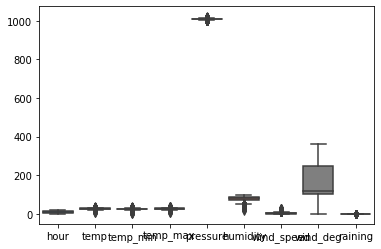

In [8]:
# 3. Outlier Detection

import seaborn as sns

sns.boxplot(data=data)

def outliers(df, feat:str):
    q1=df[feat].quantile(0.25)
    q3=df[feat].quantile(0.75)
    
    iqr = q3 - q1
    minimum = q1 - (1.5 * iqr)
    maximum = q3 + (1.5 * iqr)
    outliers = df[(df[feat] < minimum) | (df[feat] > maximum)]
    return outliers

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining


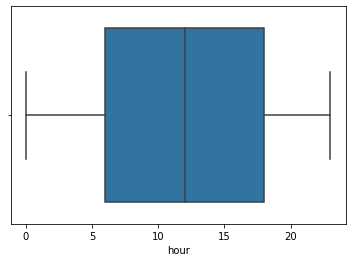

In [9]:
sns.boxplot(x=data["hour"])
outliers(data, "hour")

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
4988,20,20.90,20.9,20.9,1010.4,91,5.24,121,True
4989,21,20.90,20.9,20.9,1010.4,91,5.06,119,True
4990,22,20.90,20.9,20.9,1010.4,91,4.86,112,True
4991,23,21.20,21.2,21.2,1011.7,85,4.97,112,False
4992,0,21.20,21.2,21.2,1011.7,85,5.33,113,False
...,...,...,...,...,...,...,...,...,...
264588,5,33.70,33.2,34.0,1008.0,59,3.60,140,False
264589,6,33.73,33.2,34.0,1007.0,63,4.60,130,False
264590,7,33.70,33.2,34.0,1006.0,63,5.10,130,False
264612,5,32.66,32.1,33.0,1009.0,70,2.60,0,False


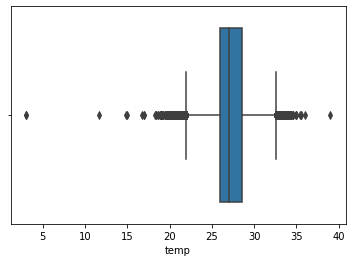

In [10]:
sns.boxplot(x=data["temp"])
outliers(data, "temp")

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
386,2,32.40,32.4,32.4,1005.0,59,2.10,260,False
387,3,32.40,32.4,32.4,1005.0,59,2.10,260,False
388,4,32.40,32.4,32.4,1005.0,59,2.10,260,False
4988,20,20.90,20.9,20.9,1010.4,91,5.24,121,True
4989,21,20.90,20.9,20.9,1010.4,91,5.06,119,True
...,...,...,...,...,...,...,...,...,...
264587,4,32.77,32.4,33.0,1009.0,62,3.60,110,False
264588,5,33.70,33.2,34.0,1008.0,59,3.60,140,False
264589,6,33.73,33.2,34.0,1007.0,63,4.60,130,False
264590,7,33.70,33.2,34.0,1006.0,63,5.10,130,False


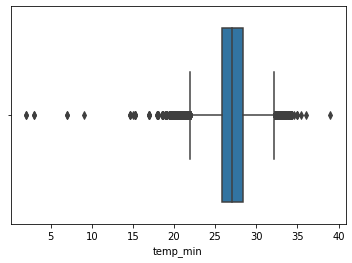

In [11]:
sns.boxplot(x=data["temp_min"])
outliers(data, "temp_min")

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
4988,20,20.90,20.9,20.9,1010.4,91,5.24,121,True
4989,21,20.90,20.9,20.9,1010.4,91,5.06,119,True
4990,22,20.90,20.9,20.9,1010.4,91,4.86,112,True
4991,23,21.20,21.2,21.2,1011.7,85,4.97,112,False
4992,0,21.20,21.2,21.2,1011.7,85,5.33,113,False
...,...,...,...,...,...,...,...,...,...
264564,6,33.83,33.5,34.0,1007.0,56,3.60,130,False
264588,5,33.70,33.2,34.0,1008.0,59,3.60,140,False
264589,6,33.73,33.2,34.0,1007.0,63,4.60,130,False
264590,7,33.70,33.2,34.0,1006.0,63,5.10,130,False


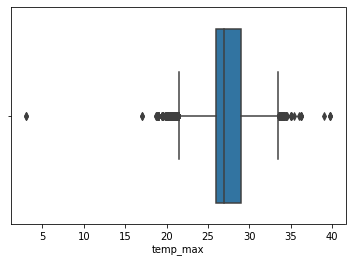

In [12]:
sns.boxplot(x=data["temp_max"])
outliers(data, "temp_max")

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
22480,5,28.20,28.2,28.2,1019.9,56,5.10,110,False
22481,6,28.20,28.2,28.2,1019.9,56,5.10,110,False
22482,7,28.20,28.2,28.2,1019.9,56,5.10,110,False
52117,8,29.00,29.0,29.0,1003.1,66,8.70,270,False
52118,9,29.20,29.2,29.2,1003.1,65,9.80,270,False
...,...,...,...,...,...,...,...,...,...
247803,22,28.04,28.0,28.1,1003.0,84,4.63,300,False
247804,23,28.34,28.0,28.9,1003.0,84,5.66,280,False
247812,7,29.13,28.0,31.0,1003.0,84,10.29,270,False
247813,8,27.92,27.8,28.0,1003.0,84,11.83,270,False


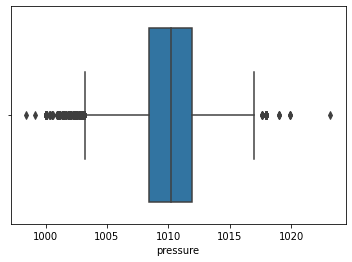

In [13]:
sns.boxplot(x=data["pressure"])
outliers(data, "pressure")

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
14979,5,28.80,28.8,28.8,1013.5,51,2.60,180,False
14980,6,28.80,28.8,28.8,1013.5,51,2.60,180,False
14981,7,28.80,28.8,28.8,1013.5,51,2.60,180,False
21784,5,30.20,30.2,30.2,1008.5,50,5.10,100,False
21785,6,30.20,30.2,30.2,1008.5,50,5.10,100,False
...,...,...,...,...,...,...,...,...,...
253585,7,30.66,30.1,31.0,1009.0,49,4.63,120,False
253606,4,29.62,29.0,30.0,1012.0,52,3.60,220,False
253608,6,30.87,30.6,31.0,1010.0,49,4.12,230,False
263142,4,31.40,30.4,32.0,1011.0,52,4.10,90,False


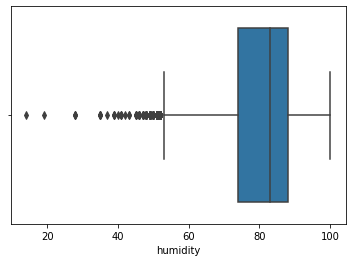

In [14]:
sns.boxplot(x=data["humidity"])
outliers(data, "humidity")

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
344,8,26.83,26.83,26.83,1005.0,87,9.23,277,True
345,9,27.07,27.07,27.07,1005.0,86,9.29,282,True
348,12,26.91,26.91,26.91,1006.0,86,8.74,285,True
452,20,25.40,25.40,25.40,1007.6,89,10.30,270,True
453,21,25.40,25.40,25.40,1007.6,89,10.30,270,True
...,...,...,...,...,...,...,...,...,...
264836,8,29.00,29.00,29.00,1005.0,83,10.30,270,False
264837,9,28.00,28.00,28.00,1005.0,88,11.80,260,False
264838,10,28.00,28.00,28.00,1005.0,83,10.80,260,False
264839,11,27.00,27.00,27.00,1006.0,88,10.30,250,False


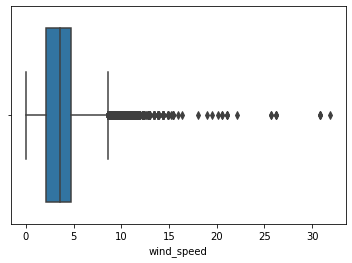

In [15]:
sns.boxplot(x=data["wind_speed"])
outliers(data, "wind_speed")

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining


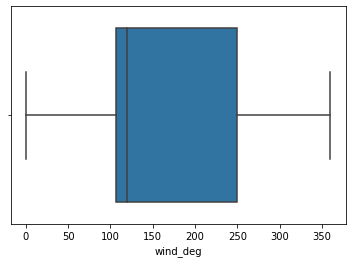

In [16]:
sns.boxplot(x=data["wind_deg"])
outliers(data, "wind_deg")

In [17]:
# Analisis Balance of Data
print("Distribusi kelas raining")
print(data['raining'].value_counts())

Distribusi kelas raining
False    230023
True      34901
Name: raining, dtype: int64


Dari informasi diatas, dapat dilihat bahwa masih terdapat _gap_ yang cukup jauh antara proporsi kelas `False` dan proporsi kelas `True`. Oleh karena itu, dapat disimpulkan bahwa dataset masih mengalami masalah _imbalance data_.

#### **Rencana Penanganan**

* Duplicate Value
  * Dilakukan penghapusan untuk data yang terduplikasi.
* Missing Value
  * Karena _missing value_ yang ada sedikit jumlahnya, maka penanganan yang akan dilakukan adalah imputasi _missing value_ terkait dengan nilai `mean` dari fitur terkait. Sedangkan untuk _missing value_ yang terdapat pada _target class_ `raining` akan dilakukan imputasi dengan _most common value_.
* Outlier
  * Untuk outlier yang memiliki korelasi tinggi terhadap _target class_ maka akan dibiarkan, tetapi bila tidak terlalu berpengaruh akan dilakukan penghapusan untuk instance terkait.
* Balance of Data
  * Untuk menangani hal ini, dapat dilakukan teknik _oversampling_ yaitu menambah jumlah observasi pada kelas minoritas atau _undersampling_ yang berarti mengurangi jumlah observasi pada kelas mayoritas.


#### **Teknik Encoding yang Digunakan**

Dari data yang tersedia, fitur-fitur yang ada beserta tipenya sebagai berikut:
* hour `int64`
* temp `float64`
* temp_min `float64`
* temp_max `float64`
* pressure `float64`
* humidity `float64`
* wind_speed `float64`
* wind_deg `float64`
* raining `object`

Berdasarkan informasi diatas, hampir semua fitur memiliki tipe numerik (`int64` dan `float64`), hanya _target class_ `raining` yang bertipe kategori.

Oleh karena itu, kami hanya akan melakukan `encoding` untuk _target class_ `raining` saja. Hal ini akan ditangani dengan cara sebagai berikut:
* Mengganti nilai `False` dengan `0`
* Mengganti nilai `True` dengan `1`


#### **Desain Eksperimen**
* Tujuan Eskperimen
* Variabel Dependen dan Independen
* Strategi Eksperimen
* Skema Validasi

### Tujuan Eksperimen
Memprediksi kemungkinan terjadinya hujan di wilayah Denpasar dari feature yang diberikan berdasarkan dataset openweatherdata-denpasar-1990-2020v0.1

### Variabel Dependen dan Independen
- Dependent Variable : raining
- Independent Variable : hour, temp, temp_min, temp_max, pressure, humidity, wind_speed, wind_deg 

### Strategi Eksperimen
Langkah-langkah yang dilakukan dalam melakukan eksperimen ini adalah:
- Melakukan preprocessing pada data berdasarkan jawaban no.3 dan no.4
- Menentukan metrik yang akan digunakan
- Memprediksi dengan menggunakan pembelajaran Logistic Regression (baseline)
- Mengevaluasi hasil pembelajaran model baseline (Logistic Regression) dengan menggunakan metrik
- Menampilkan confussion matrix dari hasil Logistic Regression
- Melakukan pembelajaran dengan menggunakan model lain (SVM)
- Melakukan hyperparameter tuning model yang digunakan (SVM) dengan menggunakan Grid Search
- Mengevaluasi hasil pembelajaran setelah dilakukan hyperparameter tuning model
- Melakukan oversampling pada kelas minoritas dan undersampling pada kelas mayoritas
- Melakukan pembelajaran terhadap model baseline menggunakan data tyang telah dilakukan oversampling dan undersampling
- Mengevaluasi hasil pembelajaran setelah melakukan oversampling dan undersampling pada data
- Menggabungkan beberapa model dengan menggunakan teknik Soft Voting, Hard Voting, dan Stacking
- Mengevaluasi hasil penggabungan model dengan teknik tersebut

### Skema Validasi
Validasi dilakukan dengan skema K-fold Cross Validation pada dataset yang telah diberikan 

### **Bagian 2**

#### Melakukan preprocessing pada data berdasarkan jawaban no.3 dan no.4

In [18]:
#Melakukan encoding untuk target (mengubah True False pada raining menjadi 1 dan 0)

def is_raining(rain):
    if rain:
        return 1
    else:
        return 0


data['raining'] = data['raining'].apply(is_raining)
df_train['raining'] = df_train['raining'].apply(is_raining)
df_val['raining'] = df_val['raining'].apply(is_raining)
df_test['raining'] = df_test['raining'].apply(is_raining)

In [19]:
#Mencari korelasi antara tiap feature dengan target
correlation = data.corr()["raining"]
print(correlation)

hour          0.083878
temp         -0.209792
temp_min     -0.207823
temp_max     -0.207877
pressure     -0.092652
humidity      0.296700
wind_speed    0.037894
wind_deg      0.154758
raining       1.000000
Name: raining, dtype: float64


Karena seluruh feature memiliki korelasi yang ***-0.8 < corr < 0.8*** maka seluruh record yang memiliki outlier akan didrop

In [20]:
#Drop Duplicate Value

df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()
df_val = df_val.drop_duplicates()

In [21]:
#Handling Outliers
# Outliers df_train temp
q1= df_train['temp'].quantile(0.25)
q3= df_train['temp'].quantile(0.75)
iqr = q3 - q1

min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)

outliers = df_train[(df_train['temp'] < min) | (df_train['temp'] > max)]
df_train.drop(index=list(outliers.index.values), inplace=True)

In [22]:
# Outliers df_train temp_min
q1= df_train['temp_min'].quantile(0.25)
q3= df_train['temp_min'].quantile(0.75)
iqr = q3 - q1

min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)

outliers = df_train[(df_train['temp_min'] < min) | (df_train['temp_min'] > max)]
df_train.drop(index=list(outliers.index.values), inplace=True)

In [23]:
# Outliers df_train temp_max
q1= df_train['temp_max'].quantile(0.25)
q3= df_train['temp_max'].quantile(0.75)
iqr = q3 - q1

min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)

outliers = df_train[(df_train['temp_max'] < min) | (df_train['temp_max'] > max)]
df_train.drop(index=list(outliers.index.values), inplace=True)

In [24]:
# Outliers df_train pressure
q1= df_train['pressure'].quantile(0.25)
q3= df_train['pressure'].quantile(0.75)
iqr = q3 - q1

min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)

outliers = df_train[(df_train['pressure'] < min) | (df_train['pressure'] > max)]
df_train.drop(index=list(outliers.index.values), inplace=True)

In [25]:
# Outliers df_train humidity
q1= df_train['humidity'].quantile(0.25)
q3= df_train['humidity'].quantile(0.75)
iqr = q3 - q1

min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)

outliers = df_train[(df_train['humidity'] < min) | (df_train['humidity'] > max)]
df_train.drop(index=list(outliers.index.values), inplace=True)

In [26]:
# Outliers df_train wind_speed
q1= df_train['wind_speed'].quantile(0.25)
q3= df_train['wind_speed'].quantile(0.75)
iqr = q3 - q1

min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)

outliers = df_train[(df_train['wind_speed'] < min) | (df_train['wind_speed'] > max)]
df_train.drop(index=list(outliers.index.values), inplace=True)

Memisahkan Data

In [27]:
# Menggunakan data train untuk membuat model.
X_train = df_train.drop(['raining'], axis=1)
y_train = df_train['raining']
# Menggunakan data validasi untuk melakukan validasi.
X_val = df_val.drop(['raining'], axis=1)
y_val = df_val['raining']
# Menggunakan data validasi untuk melakukan test.
X_test = df_test.drop(['raining'], axis=1)
y_test = df_test['raining']

#### Menentukan metrik evaluasi hasil pembelajaran

Metrik yang akan digunakan dalam mengevaluasi hasil pembelajaran pada eksperimen ini adalah Accuracy, Precission, Recall, dan F1-Score

### Memprediksi dengan menggunakan pembelajaran Logistic Regression (baseline)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
# Prediksi dengan Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_rain_pred = lr.predict(X_val)

# Evaluasi Pembelajaran Logistic Regression
print("Evaluasi pembelajaran Logistic Regression: \n")
print(classification_report(y_val, lr_rain_pred))
print("precision hasil prediksi :", precision_score(y_val, lr_rain_pred))
print("recall hasil prediksi :", recall_score(y_val, lr_rain_pred))
print("f1 score hasil prediksi :", f1_score(y_val, lr_rain_pred))
print("Accuracy hasil prediksi :",accuracy_score(y_val, lr_rain_pred))

# Confusion matrix dan cross validation (5-fold)
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_val, lr_rain_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']))
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("5-fold cross validation average accuracy: %.2f" % scores.mean())
print("5-fold cross validation standard deviation: %.2f" % scores.std())

Evaluasi pembelajaran Logistic Regression: 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     36568
           1       0.59      0.14      0.22      5597

    accuracy                           0.87     42165
   macro avg       0.74      0.56      0.58     42165
weighted avg       0.84      0.87      0.84     42165

precision hasil prediksi : 0.5936777178103315
recall hasil prediksi : 0.13757370019653387
f1 score hasil prediksi : 0.22338265158108497
Accuracy hasil prediksi : 0.8730226491165659

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          36041            527
Actual Yes          4827            770
5-fold cross validation average accuracy: 0.87
5-fold cross validation standard deviation: 0.00


### Melakukan pembelajaran dengan model lain yang sekaligus melakukan hyperparameter tuning pada model tersebut (Decision Tree)

In [30]:
from sklearn import tree
decisionTreeClassifier = tree.DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train, y_train)
predicted_value = decisionTreeClassifier.predict(X_test)

print(classification_report(y_test, predicted_value))
print("precision hasil prediksi Decision Tree :", precision_score(y_test, predicted_value))
print("recall hasil prediksi Decision Tree :", recall_score(y_test, predicted_value))
print("f1 score hasil prediksi Decision Tree :", f1_score(y_test, predicted_value))
print("Accuracy hasil prediksi Decision Tree :",accuracy_score(y_test, predicted_value))
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, predicted_value),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']))

# Confusion matrix dan cross validation (5-fold)
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, predicted_value),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']))
scores = cross_val_score(decisionTreeClassifier, X_train, y_train, cv=5)
print("5-fold cross validation average accuracy: %.2f" % scores.mean())
print("5-fold cross validation standard deviation: %.2f" % scores.std())



              precision    recall  f1-score   support

           0       0.92      0.91      0.91     45593
           1       0.44      0.45      0.45      6989

    accuracy                           0.85     52582
   macro avg       0.68      0.68      0.68     52582
weighted avg       0.85      0.85      0.85     52582

precision hasil prediksi Decision Tree : 0.4421920872361247
recall hasil prediksi Decision Tree : 0.45256832164830446
f1 score hasil prediksi Decision Tree : 0.4473200395983595
Accuracy hasil prediksi Decision Tree : 0.8513559773306455

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          41603           3990
Actual Yes          3826           3163

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          41603           3990
Actual Yes          3826           3163
5-fold cross validation average accuracy: 0.85
5-fold cross validation standard deviation: 0.00


Hyperparameter Tuning untuk Pembelajaran Decision Tree

In [32]:
dtc = tree.DecisionTreeClassifier()

param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4], 'max_features': [None, 'sqrt', 'log2']}
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_dtc = tree.DecisionTreeClassifier(**best_params)
best_dtc.fit(X_train, y_train)
predicted_value = best_dtc.predict(X_test)

print(classification_report(y_test, predicted_value))
print("precision hasil prediksi Decision Tree :", precision_score(y_test, predicted_value))
print("recall hasil prediksi Decision Tree :", recall_score(y_test, predicted_value))
print("f1 score hasil prediksi Decision Tree :", f1_score(y_test, predicted_value))
print("Accuracy hasil prediksi Decision Tree :",accuracy_score(y_test, predicted_value))

# Confusion matrix dan cross validation (5-fold)
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, predicted_value),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']))
scores = cross_val_score(best_dtc, X_train, y_train, cv=5)
print("5-fold cross validation average accuracy: %.2f" % scores.mean())
print("5-fold cross validation standard deviation: %.2f" % scores.std())


              precision    recall  f1-score   support

           0       0.90      0.97      0.94     45593
           1       0.63      0.31      0.42      6989

    accuracy                           0.88     52582
   macro avg       0.77      0.64      0.68     52582
weighted avg       0.87      0.88      0.87     52582

precision hasil prediksi Decision Tree : 0.63001443001443
recall hasil prediksi Decision Tree : 0.3123479753898984
f1 score hasil prediksi Decision Tree : 0.4176391811746699
Accuracy hasil prediksi Decision Tree : 0.8842189342360504

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          44311           1282
Actual Yes          4806           2183
5-fold cross validation average accuracy: 0.88
5-fold cross validation standard deviation: 0.00


### Melakukan Oversampling pada data kelas minoritas lalu melakukan pembelajaran pada data tersebut dengan Logistic Regression

In [35]:
from imblearn.over_sampling import RandomOverSampler

# oversampling pada kelas minoritas pada data latih
ros = RandomOverSampler(random_state=47)
ros_x_train, ros_y_train = ros.fit_resample(X_train, y_train)

# train using Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(ros_x_train, ros_y_train)
lr_rain_pred = lr.predict(X_test)

# evaluasi
print("Evaluasi pembelajaran Logistic Regression: \n")
print(classification_report(y_test, lr_rain_pred))
print("Precision hasil prediksi : ", precision_score(y_test, lr_rain_pred))
print("Recall hasil prediksi    : ", recall_score(y_test, lr_rain_pred))
print("F1 Score hasil prediksi  : ", f1_score(y_test, lr_rain_pred))
print("Accuracy hasil prediksi  : ", accuracy_score(y_test, lr_rain_pred))


# confusion matrix
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, lr_rain_pred), columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes']))
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("5-fold cross validation average accuracy: %.2f" % scores.mean())
print("5-fold cross validation standard deviation: %.2f" % scores.std())

Evaluasi pembelajaran Logistic Regression: 

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     45593
           1       0.29      0.76      0.41      6989

    accuracy                           0.72     52582
   macro avg       0.62      0.73      0.61     52582
weighted avg       0.86      0.72      0.76     52582

Precision hasil prediksi :  0.28579936116073845
Recall hasil prediksi    :  0.7553298039776792
F1 Score hasil prediksi  :  0.4146897093479968
Accuracy hasil prediksi  :  0.7165950325206344

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          32401          13192
Actual Yes          1710           5279
5-fold cross validation average accuracy: 0.87
5-fold cross validation standard deviation: 0.00


### Melakukan Undersampling pada data kelas mayoritas lalu melakukan pembelajaran pada data tersebut dengan Logistic Regression

In [36]:
from imblearn.under_sampling import RandomUnderSampler

# undersampling pada kelas minoritas pada data latih
rus = RandomUnderSampler(random_state=47)
rus_x_train, rus_y_train = rus.fit_resample(X_train, y_train)

# train using Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(rus_x_train, rus_y_train)
lr_rain_pred = lr.predict(X_test)

# evaluasi
print("Evaluasi pembelajaran Logistic Regression: \n")
print(classification_report(y_test, lr_rain_pred))
print("Precision hasil prediksi : ", precision_score(y_test, lr_rain_pred))
print("Recall hasil prediksi    : ", recall_score(y_test, lr_rain_pred))
print("F1 Score hasil prediksi  : ", f1_score(y_test, lr_rain_pred))
print("Accuracy hasil prediksi  : ", accuracy_score(y_test, lr_rain_pred))

# confusion matrix
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, lr_rain_pred), columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes']))

Evaluasi pembelajaran Logistic Regression: 

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     45593
           1       0.29      0.76      0.41      6989

    accuracy                           0.72     52582
   macro avg       0.62      0.73      0.61     52582
weighted avg       0.86      0.72      0.76     52582

Precision hasil prediksi :  0.28540540540540543
Recall hasil prediksi    :  0.7554728859636571
F1 Score hasil prediksi  :  0.4142963631370395
Accuracy hasil prediksi  :  0.7160815488189874

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          32373          13220
Actual Yes          1709           5280


Melakukan Soft Voting

In [38]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

lr = LogisticRegression()
dtc = tree.DecisionTreeClassifier()
#Melakukan soft voting classifier.
ensemble_soft = VotingClassifier(estimators=[
  ('lr', lr),
  ('dtc', dtc)
  ], voting='soft')
ensemble_soft.fit(X_train, y_train)
predicted_value = ensemble_soft.predict(X_test)

# Mengevaluasi hasil prediksi.
print("Evaluasi pembelajaran Voting Classifier: \n")
print(classification_report(y_test, predicted_value))
print("Precision hasil prediksi : ", precision_score(y_test, predicted_value))
print("Recall hasil prediksi    : ", recall_score(y_test, predicted_value))
print("F1 Score hasil prediksi  : ", f1_score(y_test, predicted_value))
print("Accuracy hasil prediksi  : ", accuracy_score(y_test, predicted_value))

# confusion matrix
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, predicted_value), columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes']))
scores = cross_val_score(ensemble_soft, X_train, y_train, cv=5)
print("5-fold cross validation average accuracy: %.2f" % scores.mean())
print("5-fold cross validation standard deviation: %.2f" % scores.std())


Evaluasi pembelajaran Voting Classifier: 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     45593
           1       0.44      0.46      0.45      6989

    accuracy                           0.85     52582
   macro avg       0.68      0.68      0.68     52582
weighted avg       0.85      0.85      0.85     52582

Precision hasil prediksi :  0.4429623454217035
Recall hasil prediksi    :  0.4561453712977536
F1 Score hasil prediksi  :  0.4494572113351192
Accuracy hasil prediksi  :  0.8514700848199004

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          41584           4009
Actual Yes          3801           3188
5-fold cross validation average accuracy: 0.85
5-fold cross validation standard deviation: 0.00


Melakukan Hard Voting

In [40]:
lr = LogisticRegression()
dtc = tree.DecisionTreeClassifier()
#Melakukan hard voting classifier.
ensemble_hard = VotingClassifier(estimators=[
  ('lr', lr),
  ('dtc', dtc)
  ], voting='hard')
ensemble_hard.fit(X_train, y_train)
predicted_value = ensemble_hard.predict(X_test)

# Mengevaluasi hasil prediksi.
print("Evaluasi pembelajaran Voting Classifier: \n")
print(classification_report(y_test, predicted_value))
print("Precision hasil prediksi : ", precision_score(y_test, predicted_value))
print("Recall hasil prediksi    : ", recall_score(y_test, predicted_value))
print("F1 Score hasil prediksi  : ", f1_score(y_test, predicted_value))
print("Accuracy hasil prediksi  : ", accuracy_score(y_test, predicted_value))

# confusion matrix
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, predicted_value), columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes']))
scores = cross_val_score(ensemble_hard, X_train, y_train, cv=5)
print("5-fold cross validation average accuracy: %.2f" % scores.mean())
print("5-fold cross validation standard deviation: %.2f" % scores.std())


Evaluasi pembelajaran Voting Classifier: 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     45593
           1       0.67      0.08      0.14      6989

    accuracy                           0.87     52582
   macro avg       0.77      0.54      0.54     52582
weighted avg       0.85      0.87      0.83     52582

Precision hasil prediksi :  0.6686531585220501
Recall hasil prediksi    :  0.08026899413363857
F1 Score hasil prediksi  :  0.14333163004598876
Accuracy hasil prediksi  :  0.8724658628427979

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          45315            278
Actual Yes          6428            561
5-fold cross validation average accuracy: 0.87
5-fold cross validation standard deviation: 0.00


Melakukan Stacking

In [41]:
lr = LogisticRegression()
dtc = tree.DecisionTreeClassifier()
#Melakukan stacking classifier.
ensemble_stacking = StackingClassifier(estimators=[
  ('lr', lr),
  ('dtc', dtc)
  ], final_estimator=LogisticRegression())
ensemble_stacking.fit(X_train, y_train)
predicted_value = ensemble_stacking.predict(X_test)

# Mengevaluasi hasil prediksi.
print("Evaluasi pembelajaran Voting Classifier: \n")
print(classification_report(y_test, predicted_value))
print("Precision hasil prediksi : ", precision_score(y_test, predicted_value))
print("Recall hasil prediksi    : ", recall_score(y_test, predicted_value))
print("F1 Score hasil prediksi  : ", f1_score(y_test, predicted_value))
print("Accuracy hasil prediksi  : ", accuracy_score(y_test, predicted_value))

# confusion matrix
print("\nConfusion matrix: \n")
print(pd.DataFrame(confusion_matrix(y_test, predicted_value), columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes']))
scores = cross_val_score(ensemble_stacking, X_train, y_train, cv=5)
print("5-fold cross validation average accuracy: %.2f" % scores.mean())
print("5-fold cross validation standard deviation: %.2f" % scores.std())


Evaluasi pembelajaran Voting Classifier: 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     45593
           1       0.61      0.23      0.34      6989

    accuracy                           0.88     52582
   macro avg       0.75      0.60      0.63     52582
weighted avg       0.86      0.88      0.85     52582

Precision hasil prediksi :  0.6131359149582384
Recall hasil prediksi    :  0.23107740735441407
F1 Score hasil prediksi  :  0.3356541619037722
Accuracy hasil prediksi  :  0.8784184701989274

Confusion matrix: 

            Predicted No  Predicted Yes
Actual No          44574           1019
Actual Yes          5374           1615
5-fold cross validation average accuracy: 0.88
5-fold cross validation standard deviation: 0.00
